<a href="https://colab.research.google.com/github/ZacharyKahn16/Coding-for-engineers-and-business/blob/master/Python_Math_Tools_for_Engineering_Applications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Math Tools for Engineering Applications
We use a lot of math in engineering. We often also talk about the following topics when solving engineering problems:
- Numerical methods (using calculus to solve various types of equations)
- Optimization (minimizing or maximizing some function)
- Simulation
- Statistics
- Models

What's interesting is that a lot of these problems can be solved using computers. More specifically, they can be solved by using code to build solutions to specific problems.

Python is a programming language commonly used to solve engineering problems in the above areas. This workbook will go through examples of how to use Python to solve problems using numerical methods and optimization.

This is a **brief** overview of what you can do with Python. Getting a taste of everything avialable takes time and practice. The goal Here is that you get an idea of what's out there and what can be done using some powerful Python math libraries.

A library is a collection of code that has various functions that when given an input will perform a task and give you the output. For math libraries, these include:
- Performing integration
- Performing differentiation
- Much, much, more

## Prerequisites
It is expected you know the basics of Python.
You can check out a list of resources at the bottom of [this workbook](https://github.com/ZacharyKahn16/Coding-for-engineers-and-business/blob/master/Coding_For_Engineers.ipynb).

## Material Covered in this workbook
- How to compute a simple integral
- How to optimize a function (find the min)
- How to solve an ODE
- How to curve fit

Alright, let's get into it!

## Libraries used throughout workbook
There are two libraries used in all the examples:
- [numpy](https://numpy.org/doc/stable/user/absolute_beginners.html)
- [scipy](https://docs.scipy.org/doc/scipy/reference/tutorial/index.html)

There is so much you can do with these two libraries alone, so don't worry if you feel overwhelmed when you first take a look at them!

I find it helps to think about the problem you want to solve, try to find an example similar to it, look at the code for that example, and then slowly work the existing solution towards you specific problem. Along the way, try to really understand what each line of code does. This is **crucial** because if you don't understand each line, then when something goes wrong (it always does...) it will be very difficult to figure out the problem.


## Examples

In [1]:
# Import required libraries
import numpy as np
import scipy

### How to compute a simple integral

In [4]:
# Start with a simple integral

# Import integral specific library
from scipy import integrate

# Define the function we want to integrate
def my_func(x):
  return x**2 + 3

# Define the limits of integration
lower, upper = 0, 4

# Get the results
integral, err = integrate.quad(my_func, lower, upper)

print("Integral: {}".format(integral))
print("Erros: {}".format(err))

Integral: 33.33333333333333
Erros: 3.700743415417188e-13


In [5]:
# How about performing a double integral?

# Inner integral limits
inner_lower, inner_upper = 0, 5
# Outer integral limits
outer_lower, outer_upper = 2, 4

# Double integral function
def dbl_func(x, t):
  return x*t

integral, err = integrate.dblquad(dbl_func, outer_lower, outer_upper,
                                  lambda x: inner_lower, lambda x: inner_upper)

print("Integral: {}".format(integral))
print("Erros: {}".format(err))

Integral: 75.00000000000001
Erros: 8.326672684688676e-13


### How to optimize a function (find the min)

In [7]:
# Import optimize library
from scipy.optimize import minimize_scalar

# Define our function
def func_to_min(x):
  return x**2 + 5

result = minimize_scalar(func_to_min)

print("Minimum function value: {}".format(result.fun))

Minimum function value: 5.0


To do more complex optimizations, check out the [scipy.optimize documentation](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#global-optimization).

### How to solve an ODE

ODEs come up all the time in engineering applications. We can solve these with Python as well!

In [ ]:
Great [example video](https://www.youtube.com/watch?v=U7uyj9BaNKg) we will be stepping through.

Can solve ODEs using solve_ivp as well, great example [here](https://pundit.pratt.duke.edu/wiki/Python:Ordinary_Differential_Equations).

Finally, can check out and example of how I used Python to do my [Chemical Reactor design](https://github.com/ZacharyKahn16/Chemical_Engineering_Reactor_Design/blob/master/ENCH%20531%20PBR%20Design.ipynb) for my capstone project.

### How to curve fit

Often times we have data and we want to fit a curve to it. Let's see how this can be done!*italicized text*

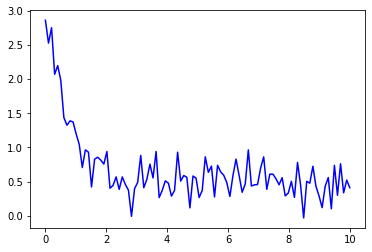

In [9]:
# Example based off this one: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

xdata = np.linspace(0, 10, 100)
y = func(xdata, 2.5, 1.3, 0.5)
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

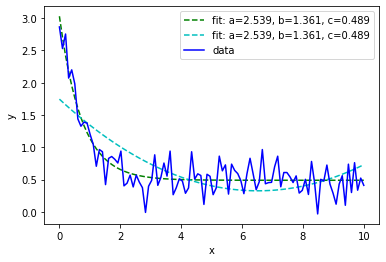

In [22]:
# Curve fit using same function
popt, pcov = curve_fit(func, xdata, ydata)

# Curve fit using guessed function
def func_bad_guess(x, a, b, c):
    return a*x**2 - b*x - c
popt_2, pcov_2 = curve_fit(func_bad_guess, xdata, ydata)

# Using a good guess for your data's shape
plt.plot(xdata, func(xdata, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

# Using a suboptimal function choice for your data's shape
plt.plot(xdata, func_bad_guess(xdata, *popt_2), 'c--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

# Original data
plt.plot(xdata, ydata, 'b-', label='data')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Interested in a full course on this stuff?
Thanks for going through the *Python Math Tools for Engineering Applications* notebook! I hope you enjoyed it.

I am looking to see if it is worth making a full course based on this material. Who better to ask than the people who it would be for?

Also, it would be great to your feedback on the presentation.

If you could fill out the following Google Form, letting me know how I did and if you'd be interested in a course, that would be awesome!

Form: https://forms.gle/Zqi1iYJRq9JrzPyA6